<a href="https://colab.research.google.com/github/MARIAMLUCAS/mariam-lucas-fst-repo/blob/main/WDA_Code_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# upload dataset to google colab
from google.colab import files
uploaded = files.upload()

Saving sales_data_sample.csv to sales_data_sample.csv


In [2]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# read the dataset
df = pd.read_csv('sales_data_sample.csv',encoding = "latin-1")

In [3]:
# display first 5 rows from the dataset
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
# getting the dataset shape
df.shape

(2823, 25)

In [5]:
# check missing values
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [6]:
# handling unrequired columns and the missing values
df = df.drop(columns=['TERRITORY','POSTALCODE','ADDRESSLINE2',
'PHONE','STATE','PRODUCTCODE','MSRP','CONTACTFIRSTNAME','CONTACTLASTNAME','QTR_ID','ORDERLINENUMBER'])

In [7]:
# getting info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   SALES            2823 non-null   float64
 4   ORDERDATE        2823 non-null   object 
 5   STATUS           2823 non-null   object 
 6   MONTH_ID         2823 non-null   int64  
 7   YEAR_ID          2823 non-null   int64  
 8   PRODUCTLINE      2823 non-null   object 
 9   CUSTOMERNAME     2823 non-null   object 
 10  ADDRESSLINE1     2823 non-null   object 
 11  CITY             2823 non-null   object 
 12  COUNTRY          2823 non-null   object 
 13  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 308.9+ KB


In [8]:
# convert the ORDERDATE column to datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [9]:
# To compute the Total Revenue generated for each order, we can create a new column called "Total Price".
df['Total Price'] = df['QUANTITYORDERED'] * df['PRICEEACH']

In [10]:
# To compute the required metrics for each product, we can group the data by Product and then calculate the metrics for each group.
product_metrics = df.groupby('PRODUCTLINE').agg(
    Total_Revenue=('Total Price', 'sum'),
    Total_Units_Sold=('QUANTITYORDERED', 'sum'),
    Average_Price=('PRICEEACH', 'mean'),
    Total_Orders=('ORDERNUMBER', 'nunique'),
)

In [11]:
# Rank the products based on the metrics
product_metrics_ranked = product_metrics.sort_values(by=['Total_Revenue', 'Total_Units_Sold', 'Total_Orders'], ascending=False)

print(product_metrics_ranked)

                  Total_Revenue  Total_Units_Sold  Average_Price  Total_Orders
PRODUCTLINE                                                                   
Classic Cars         2968546.40             33992      87.335781           199
Vintage Cars         1644212.05             21069      78.148204           175
Motorcycles           971086.29             11663      82.997553            72
Trucks and Buses      947355.18             10777      87.527940            73
Planes                877942.21             10727      81.740915            59
Ships                 677940.40              8127      83.855470            65
Trains                203804.26              2712      75.654675            45


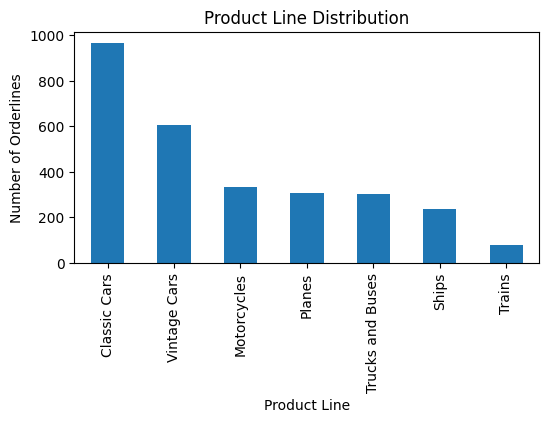

In [12]:
# display top selling products 
plt.figure(figsize=(6,3))
df['PRODUCTLINE'].value_counts().plot(kind = 'bar')
plt.title('Product Line Distribution')
plt.xlabel('Product Line')
plt.ylabel('Number of Orderlines')
plt.show()

Text(0.5, 1.0, 'Average Price by Month')

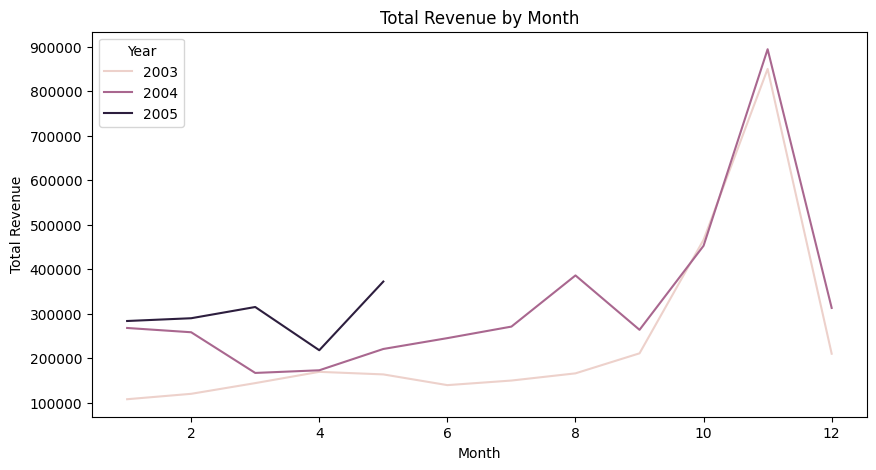

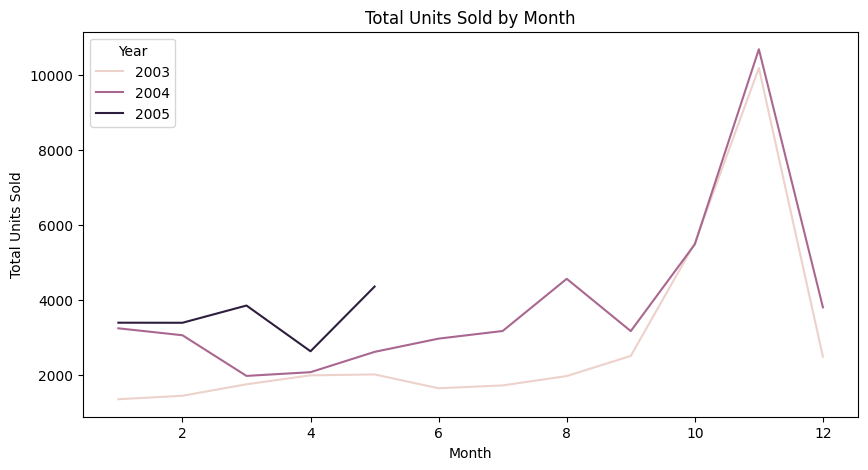

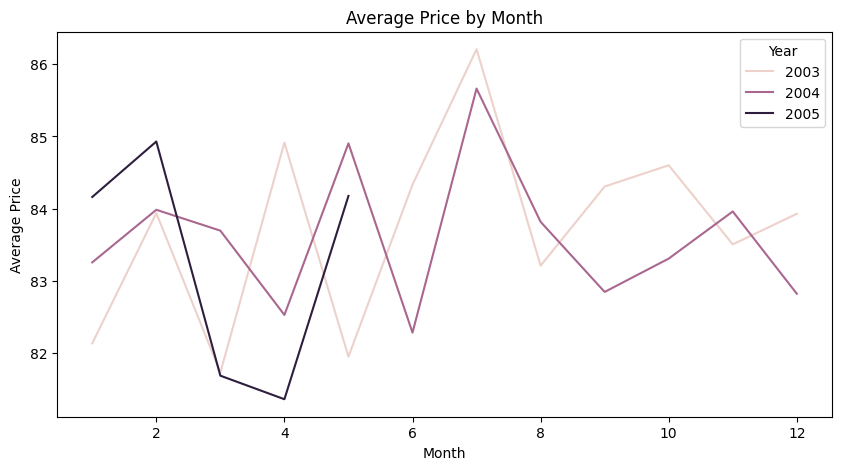

In [13]:
# To compute the metrics for each month, we extracted the Month and Year information from the Order Date column and grouped the data by Month and Year.
df['Month'] = df['ORDERDATE'].dt.month
df['Year'] = df['ORDERDATE'].dt.year
month_metrics = df.groupby(['Year', 'Month']).agg(
    Total_Revenue=('Total Price', 'sum'),
    Total_Units_Sold=('QUANTITYORDERED', 'sum'),
    Average_Price=('PRICEEACH', 'mean'),
)
month_metrics.reset_index(level=['Year', 'Month'], inplace=True)

# Plotting the metrics over time
plt.figure(figsize=(10,5))
sns.lineplot(data=month_metrics, x='Month', y='Total_Revenue', hue='Year')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Month')

plt.figure(figsize=(10,5))
sns.lineplot(data=month_metrics, x='Month', y='Total_Units_Sold', hue='Year')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold by Month')

plt.figure(figsize=(10,5))
sns.lineplot(data=month_metrics, x='Month', y='Average_Price', hue='Year')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price by Month')

In [14]:
# Ranking top 5 cities with best selling during the period beteen 2003 and 2005
top_city = df.groupby(['CITY']).sum().sort_values(by=['SALES'], ascending=False).head()
top_city.reset_index(inplace = True)
# describing the data 
top_city.head()

<ipython-input-14-0bf59bd3f4a0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_city = df.groupby(['CITY']).sum().sort_values(by=['SALES'], ascending=False).head()


,CITY,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,MONTH_ID,YEAR_ID,Total Price,Month,Year
0,Madrid,3125051,10958,24967.85,1082551.44,1890,609217,902094.19,1890,609217
1,San Rafael,1850123,6366,14996.69,654858.06,1121,360724,530587.19,1121,360724
2,NYC,1557804,5294,12980.49,560787.77,1289,304555,450418.63,1289,304555
3,Singapore,806424,2760,6581.90,288488.41,564,158278,227985.50,564,158278
4,Paris,717819,2521,5924.74,268944.68,421,140270,212959.82,421,140270


In [15]:
# top 5 best selling cities in each year in 2003, 2004 and 2005
city = df.groupby(['YEAR_ID','CITY'])['SALES'].sum().reset_index()
city['Rank'] = city.groupby('YEAR_ID')['SALES'].rank(method = 'dense',ascending = False).astype('int')  
city = city.query('Rank <= 5 ').sort_values(by = ['YEAR_ID','Rank'])
y03 = city.query('YEAR_ID == 2003 ')
y04 = city.query('YEAR_ID == 2004 ')
y05 = city.query('YEAR_ID == 2005 ')

In [16]:
#display top cities in plots
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(
    rows=1, cols=3,shared_yaxes=True, subplot_titles=("SALES BY CITY 2003", "SALES BY CITY 2004","SALES BY CITY 2005")
)
fig.add_trace(go.Bar(x=y03['CITY'], y = y03['SALES'],name='2003',
                     marker=dict(color=y03['SALES'], coloraxis="coloraxis")), row=1, col=1)
fig.add_trace(go.Bar(x=y04['CITY'], y = y04['SALES'],name='2004',
                     marker=dict(color=y04['SALES'], coloraxis="coloraxis")), row=1, col=2)
fig.add_trace(go.Bar(x=y05['CITY'], y = y05['SALES'],name='2004',
                     marker=dict(color=y05['SALES'], coloraxis="coloraxis")), row=1, col=3)
fig.update_xaxes(title_text="City", row=1, col=1)
fig.update_xaxes(title_text="City", row=1, col=2)
fig.update_xaxes(title_text="City", row=1, col=3)
fig = fig.update_layout(title={'text' : 'TOP 5 CITY BY SALES',
                             'y':0.9,'x':0.5,'xanchor': 'center'})
fig = fig.update_layout(template = 'simple_white')
fig.update_layout(title_font_color='red')
fig.update_layout(title_font_family='Times New Roman')
fig.update_layout(coloraxis=dict(colorscale='solar'), showlegend=False)
fig.show()